# Математический анализ - 1, ФКН ВШЭ

## Лабораторная работа 2: Численное интегрирование and beyond

### Оценивание и штрафы

Максимально допустимая оценка за работу — **5 (+5) баллов**.  После мягкого дедлайна оценка каждый день уменьшается на 1 балл до жесткого дедлайна. Сдавать задание после указанного срока сдачи нельзя.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Весь код должен быть написан самостоятельно. Чужим кодом пользоваться запрещается,даже с указанием ссылки на источник. В разумных рамках, конечно. Взять пару очевидных строчек кода для реализации какого-то небольшого функционала можно.

Неэффективная реализация кода может негативно отразиться на оценке (например, лишние циклы, `np.vectorize`, `np.apply_along_axis`). Также оценка может быть снижена за плохо читаемый код и плохо оформленные графики. Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.

Использование генеративных языковых моделей разрешено только в случае явного указания на это. Необходимо прописать (в соответствующих пунктах, где использовались, либо в начале/конце работы):

- какая языковая модель использовалась
- какие использовались промпты и в каких частях работы
- с какими сложностями вы столкнулись при использовании генеративных моделей, с чем они помогли больше всего

**Мягкий дедлайн: 27.04.2025 23:59 (по МСК)**

**Жесткий дедлайн: 30.04.2025 23:59 (по МСК)**

**Сдавать сюда: [Классрум](https://classroom.google.com/c/NzExNTY1NTIzMjcy/a/NzcxNzA0MTE2MjMz/details)**

### О задании

В данной лабораторной работе вы познакомитесь с методами численного интегрирования. Эти методы широко применяются в математическом анализе, численных расчетах и моделировании процессов, где точные аналитические решения недоступны или слишком сложны для использования. Интегралы часто встречаются в прикладных задачах физики, теории вероятности и статистике и даже в машинном / глубинном обучении.

В первой части задания вам предстоит реализовать классические методы численного интегрирования, основанные на определении определенного интеграла и подсчете интегральных сумм.

Во второй части познакомитесь и реализуете численное интегрирование квадратурами Гаусса-Лежандра. Примените метод Ньютона для нахождения корней ортогональных полиномов Лежандра и не только.

В третьей части вас ждет известный метод Монте-Карло, с помощью которого оценивают многомерные интегралы: один из самых важных алгоритмов, который часто используют в машинном обучении, статистике, финансах и других прикладных областях. Большая часть заданий будет посвящена алгоритмам сэмплирования данных из заданного распределения.

P.S Пожалуйста, аккуратно оформляйте графики, ориентироваться можно на [это](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/seminars/sem02-charts.ipynb). У графиков обязательно должно быть:

- Название
- Подписанные оси
- Легенда, если необходимо (например, если несколько графиков на одном рисунке)
- Все должно быть четко видно и ничего не сливаться
- За некрасивые графики можем снизить баллы

In [ ]:
from typing import Callable, Tuple

import matplotlib.pyplot as plt
import numpy as np
import scipy

## Часть 1: Классические методы

Вспомним определение определенного интеграла Римана $I$ для функции $f: [a, b] \longrightarrow \mathbb{R}$: (для упрощения $f \in C^{\infty}[a, b]$)

$$
I = \int\limits_a^b f(x)dx = \lim\limits_{n \to \infty} I_n = \lim\limits_{n \to \infty} \sum\limits_{i = 1}^n f(\xi_i) \cdot |\Delta_i|,
$$

где $a = x_0 < x_1 < \ldots < x_n = b$ - точки разбиения, $\Delta_i = [x_{i - 1}, x_{i}]$, $\xi_i \in \Delta_i$

Различные численные методы интегрирования основаны на выборе конкретных точек $\xi_i$ и дают разные оценки погрешности. Для упрощения будем считать, что все подотрезки имеют одинаковую длину

### Left and Right Rules

В этих методах в качестве точек $\xi_i$ используются левые и правые концы соответствующих подотрезков $\Delta_i$, соответственно. Для этих методов существует следующая оценка погрешности:

$$
|I - I_n| = O\left(\frac{1}{n}\right),
$$


### Middle Rule

В этом методе в качестве точек $\xi_i$ берутся середины подотрезков $\Delta_i$. Оценка погрешности для этого метода имеет вид:

$$
|I - I_n| = O\left(\frac{1}{n^2}\right)
$$

### Trapezoidal Rule

Метод трапеций использует усреднение значений функции в концах каждого подотрезка. Оценка погрешности для метода трапеций также имеет вид:

$$
|I - I_n| = O\left(\frac{1}{n^2}\right)
$$

### Simpson's Rule

Метод Симпсона использует аппроксимацию функции параболой на каждом подотрезке, что даёт оценку погрешности порядка:

$$
|I - I_n| = O\left(\frac{1}{n^4}\right)
$$

$$
I_n = \int_a^b f(x)dx \approx \frac{1}{3} h\left[f(x_0) + 4\sum_{i = 1}^{n/2} f(x_{2i - 1}) + 2\sum_{i = 1}^{n/2 - 1} f(x_{2i}) + f(x_n)\right],
$$

где $h = (b - a) / n$

**Задание 1 (1 балл):** Реализуйте все методы выше и протестируйте на функции $f(x)$. Постройте графики абсолютной ошибки при различных $n$ ($\log_{10}(n)$ vs $\log_{10}(|I - I_n|))$.

В качестве $f(x)$ и отрезка возьмите из своего варианта [БДЗ-5 №1](https://www.dropbox.com/scl/fi/qmysvv5fxt59epf9nufuo/BHW_245.pdf?rlkey=lklxktre1e8h700hz9v8rpzz2&e=1&st=rxxc6bne&dl=0)

In [ ]:
def f(x: np.ndarray) -> np.ndarray:
    f = np.exp(2*x) / (np.cosh(2*x) * np.cos(x/2))
    return f


segment = (-np.pi / 2, np.pi / 2)

In [ ]:
def left_rectangle_rule(
    f: Callable[[np.ndarray], np.ndarray], segment: Tuple[float, float], n: int
) -> float:
    a, b = segment
    h = (b - a) / n
    x = a + np.arange(n) * h
    return np.sum(f(x)) * h


def right_rectangle_rule(
    f: Callable[[np.ndarray], np.ndarray], segment: Tuple[float, float], n: int
) -> float:
    a, b = segment
    h = (b - a) / n

    x = a + np.arange(1, n + 1) * h
    return np.sum(f(x) * h)


def midpoint_rule(
    f: Callable[[np.ndarray], np.ndarray], segment: Tuple[float, float], n: int
) -> float:
    a, b = segment
    h = (b - a) / n

    x = a + (np.arange(n) + 0.5) * h
    return np.sum(f(x) * h)


def trapezoidal_rule(
    f: Callable[[np.ndarray], np.ndarray], segment: Tuple[float, float], n: int
) -> float:
    a, b = segment
    h = (b - a) / n

    x = a + np.arange (n) * h
    return (f(a) + f(b) + 2 * np.sum(f(x))) * h / 2

def simpson_rule(
    f: Callable[[np.ndarray], np.ndarray], segment: Tuple[float, float], n: int
) -> float:
    assert n % 2 == 0, "n must be an even number"

    a, b = segment
    h = (b - a) / n
    x = a + np.arange(n + 1) * h
    sum_odd  = np.sum(f(x[1:-1:2]))
    sum_even = np.sum(f(x[2:-1:2]))
    return (f(a) + 4 * sum_odd + 2 * sum_even + f(b)) * h / 3

In [ ]:
def test_problem_1():
    f = np.sin
    segment = [0, np.pi]
    exact_value = 2.0
    n = 200

    error_left = abs(left_rectangle_rule(f, segment, n) - exact_value)
    error_right = abs(right_rectangle_rule(f, segment, n) - exact_value)
    error_mid = abs(midpoint_rule(f, segment, n) - exact_value)
    error_trapez = abs(trapezoidal_rule(f, segment, n) - exact_value)
    error_simpson = abs(simpson_rule(f, segment, n) - exact_value)

    print(f'Left Rectanle Rule inaccuracy: {error_left}')
    print(f'Right Rectanle Rule inaccuracy: {error_right}')
    print(f'Midpoint Rule inaccuracy: {error_mid}')
    print(f'Trapezoidal Rule inaccuracy: {error_trapez}')
    print(f'Simpson Rule inaccuracy: {error_simpson}')

    assert error_left < 1.0e-3, "It's working on my machine! (¬‿¬)"
    assert error_right < 1.0e-3, "It's working on my machine! (¬‿¬)"
    assert error_mid < 1.0e-4, "It's working on my machine! (¬‿¬)"
    assert error_trapez < 5.0e-5, "It's working on my machine! (¬‿¬)"
    assert error_simpson < 7.0e-10, "It's working on my machine! (¬‿¬)"



test_problem_1()

Left Rectanle Rule inaccuracy: 4.112352078533554e-05
Right Rectanle Rule inaccuracy: 4.1123520784891454e-05
Midpoint Rule inaccuracy: 2.0561823810716362e-05
Trapezoidal Rule inaccuracy: 4.112352078533554e-05
Simpson Rule inaccuracy: 6.764717674911935e-10


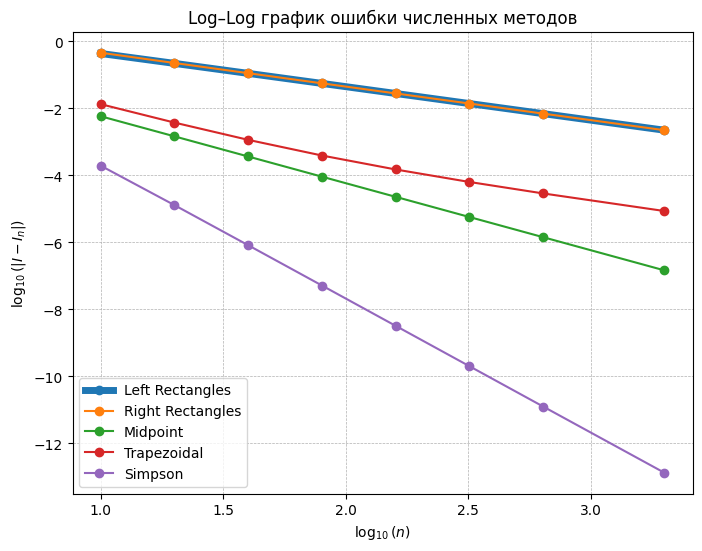

In [ ]:
I_exact = 2 * np.log (((np.sqrt(2) + 1) / (np.sqrt(2) - 1)))

methods = {
        "Left Rectangles":  left_rectangle_rule,
        "Right Rectangles": right_rectangle_rule,
        "Midpoint":         midpoint_rule,
        "Trapezoidal":      trapezoidal_rule,
        "Simpson":          simpson_rule,
    }
n_vals = [10, 20, 40, 80, 160, 320, 640, 2000]
errors = {name: [] for name in methods}

for n in n_vals:
    for name, method in methods.items():
        I_approx = method(f, segment, n)
        errors[name].append(abs(I_exact - I_approx))


x_log = np.log10(n_vals)
plt.figure(figsize=(8, 6))
for name in methods:
    if name == "Left Rectangles":
        plt.plot(x_log, np.log10(errors[name]), marker='o', label=name, linewidth=5)
    else:
        plt.plot(x_log, np.log10(errors[name]), marker='o', label=name)

plt.xlabel(r'$\log_{10}(n)$')
plt.ylabel(r'$\log_{10}(|I - I_n|)$')
plt.title("Log–Log график ошибки численных методов")
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

## Часть 2: Квадратуры


Для квадратуры Гаусса с использованием полиномов Лежандра на отрезке $ [-1, 1] $ метод может быть записан как:

$$
I = \int_{-1}^1 f(x) \, dx \approx \sum_{i=1}^{n} w_i \cdot f(x_i)
$$

где:
- $x_i$ — узлы (корни полиномов Лежандра),
- $w_i$ — веса, связанные с этими узлами

**Задание 2 (2 балла):** Реализуйте метод Гаусса from scratch. Вам понадобятся следующие знания:

### Полином Лежандра

Полиномы Лежандра $P_n(x)$ — это семейство многочленов, которые часто появляются в задачах математической физики, например, при решении уравнений в сферических координатах. Многочлены могут быть получены из многочленов $\{1, x, x^2, x^3, \ldots\}$ ортогонализацией Грама ― Шмидта. Но мы воспользуемся реккурентной формулой:

$$
P_0(x) = 1, P_1(x) = x
$$
$$
P_n(x) = \frac{(2n - 1)x P_{n-1}(x) - (n-1) P_{n-2}(x)}{n}, \quad n \geq 2
$$

### Производная полинома Лежандра

Производную полинома Лежандра можно найти с помощью рекуррентной формулы. Производная полинома Лежандра $P_n(x)$ имеет вид:

$$
\frac{dP_n(x)}{dx} = n \left(\frac{P_{n-1}(x) - x P_n(x)}{1 - x^2}\right)
$$


### Метод Ньютона

Метод Ньютона — это итерационный метод для нахождения корней функции $f(x)$. Основная идея метода Ньютона заключается в следующей формуле для нахождения корня:

$$
x^{(n + 1)} = x^{(n)} - \frac{f(x^{(n)})}{f'(x^{(n)})}
$$


P.S. Для корня $i$-ого ($i = 1, 2, \ldots, n$) полинома можно использовать начальное приближение $x_i^{(0)} = \cos\left(\frac{\pi (4i - 1)}{4n + 2}\right)$

### Веса квадратур

Для вычисления весов в методе Гаусса используют выражение:

$$
w_i = \frac{2}{(1 - x_i^2) [P'_n(x_i)]^2}
$$

где $P'_n(x_i)$ — это производная полинома Лежандра в точке $x_i$, которая является корнем полинома Лежандра $P_n(x)$.


In [ ]:
def legendre_polynomial(x: np.ndarray, n: int) -> np.ndarray:
    if n == 0:
        return np.ones_like (x)

    if n == 1:
        return x

    P2 = np.ones_like (x)
    P1 = x
    for k in range (2, n + 1):
        P = ((2 * k - 1) * x * P1 - (k - 1) * P2) / k
        P2, P1 = P1, P
    return P


def legendre_polynomial_derivative(x: np.ndarray, n: int) -> np.ndarray:
    P = legendre_polynomial(x, n)
    P1 = legendre_polynomial(x, n - 1)
    return n * (P1 - x * P) / (1 - x**2)


def roots_legendre(n: int) -> Tuple[np.ndarray, np.ndarray]:
    x = np.arange (1, n + 1)
    roots = np.cos((np.pi * (4 * x - 1)) / (4 * n + 2))

    for iter in range(100):
        roots = roots - legendre_polynomial (roots, n) / legendre_polynomial_derivative(roots, n)

    roots.sort()
    w = 2 / ((1 - roots**2) * (legendre_polynomial_derivative(roots, n))**2)

    return roots, w


def gauss_quadrature(
    f: Callable[[np.ndarray], np.ndarray], segment: Tuple[float, float], n: int
) -> float:
    a, b = segment

    roots, w = roots_legendre (n)

    #замена
    roots = 0.5 * (b - a) * roots + 0.5 * (b + a)
    return 0.5 * (b - a) * np.sum(w * f(roots))

In [ ]:
def test_problem_2():
    n_values = [3, 5, 7, 9, 11]
    for n in n_values:
        # scipy.special.roots_legendre returns sorted nodes and their weights
        true_nodes, true_weights = scipy.special.roots_legendre(n)
        pred_nodes, pred_weights = roots_legendre(n=n)

        assert np.allclose(true_nodes, pred_nodes, rtol=1.0e-15, atol=1.0e-20), (
            "It's working on my machine! (¬‿¬)"
        )

        assert np.allclose(true_weights, pred_weights, rtol=1.0e-10, atol=1.0e-20), (
            "It's working on my machine! (¬‿¬)"
        )

    def f(x):
        return np.exp(-(x**2))

    result = gauss_quadrature(f, [0, 1], 10)

    from scipy.special import erf

    analytical = 0.5 * np.sqrt(np.pi) * erf(1)
    assert np.max(np.absolute(result - analytical)) < 1.0e-20, "It's working on my machine! (¬‿¬)"


test_problem_2()

Постройте график ошибки с ростом $n$. Сравните на графике с другими методами также с ростом $n$. Какой метод лучше в сравнении точность / скорость? (Без этой части задание не будет засчитано)

**Ответ:**
Видно, что самый точный метод - Гаусс. Чтобы получить точность при n = 20 Гаусса Симпсону нужно более 2000 точек. Но Гаусс работает за $O(n^2)$, а Симпсон и остальные за $O(n)$, но так как 20*20 = 400 < 2000, то разница существенна и, очевидно, лучший метод - Гаусс. Также хорошо видно, что отношение количества точек требуемое Симпсону на Гауссу чтобы получить конкретную точность растет.   

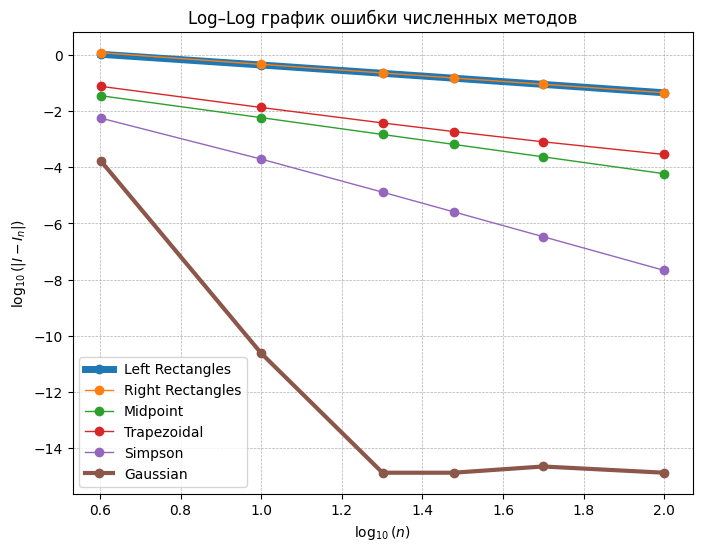

In [ ]:
methods = {
    "Left Rectangles":  left_rectangle_rule,
    "Right Rectangles": right_rectangle_rule,
    "Midpoint":         midpoint_rule,
    "Trapezoidal":      trapezoidal_rule,
    "Simpson":          simpson_rule,
    "Gaussian":         gauss_quadrature,
}

n_vals = [4, 10, 20, 30, 50, 100]
errors = {name: [] for name in methods}

for n in n_vals:
    for name, method in methods.items():
        I_approx = method(f, segment, n)
        errors[name].append(abs(I_exact - I_approx))

x_log = np.log10(n_vals)
plt.figure(figsize=(8, 6))
for name in methods:
    lw = 5 if name == "Left Rectangles" else (3 if name == "Gaussian" else 1)
    plt.plot(
        x_log,
        np.log10(errors[name]),
        marker='o',
        label=name,
        linewidth=lw,
    )

plt.xlabel(r'$\log_{10}(n)$')
plt.ylabel(r'$\log_{10}(|I - I_n|)$')
plt.title("Log–Log график ошибки численных методов")
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


**Задание 3 (2 балла):** Вот [тут](https://en.wikipedia.org/wiki/Gaussian_quadrature#Other_forms) вы можете посмотреть другие варианты многочленов. Реализуйте один из них, который вам больше понравится, опишите алгоритм в ноутбуке и сравните с другими методами (можете самостоятельно выбрать $f(x)$ и отрезок интегрирования)

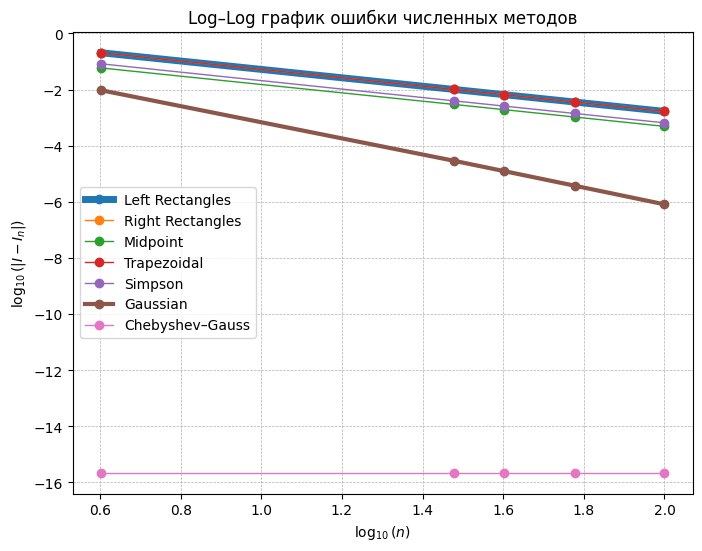

In [ ]:


g = lambda x: (1 - x)
segment = (-1, 1)
F = lambda x: (np.sqrt(1 - x**2) * (-2*x**2 + 3*x + 2) + 3*np.arcsin(x)) / 6
I_exact = F(1) - F(-1)

f = lambda x: np.sqrt(1 - x**2) * g(x)

def chebyshev_quadrature(f, segment, n): # данная функция работает только для отрезка (-1, 1), так как по условию можно выбрать любой
    i = np.arange(1, n + 1)
    x = np.cos(i / (n + 1) * np.pi)
    wi = np.pi / (n + 1) * ((np.sin(i / (n + 1) * np.pi))**2)
    return np.sum(wi * g(x))

methods = {
    "Left Rectangles":  left_rectangle_rule,
    "Right Rectangles": right_rectangle_rule,
    "Midpoint":         midpoint_rule,
    "Trapezoidal":      trapezoidal_rule,
    "Simpson":          simpson_rule,
    "Gaussian":         gauss_quadrature,
    "Chebyshev–Gauss": chebyshev_quadrature,
}

n_vals = [4, 30, 40, 60, 100]
errors = {name: [] for name in methods}

for n in n_vals:
    for name, method in methods.items():
        I_approx = method(f, segment, n)
        errors[name].append(abs(I_exact - I_approx))

x_log = np.log10(n_vals)
plt.figure(figsize=(8, 6))
for name in methods:
    lw = 5 if name == "Left Rectangles" else (3 if name == "Gaussian" else 1)
    plt.plot(
        x_log,
        np.log10(errors[name]),
        marker='o',
        label=name,
        linewidth=lw,
    )

plt.xlabel(r'$\log_{10}(n)$')
plt.ylabel(r'$\log_{10}(|I - I_n|)$')
plt.title("Log–Log график ошибки численных методов")
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()




Используем Чебышёв–Гаусс квадратура (второй случай)  
Для вычисления  
$ J = \int_{-1}^{1} \sqrt{1 - x^2}\;g(x)\,dx $  
применяем  
$ J \approx \sum_{i=1}^{n} w_i \, g(x_i), $  
где  
$ x_i = \cos\!\bigl(\tfrac{i}{\,n+1\,}\,\pi\bigr), \quad
  w_i = \tfrac{\pi}{n+1}\,\sin^2\!\bigl(\tfrac{i}{\,n+1\,}\,\pi\bigr),
  \quad i = 1,2,\dots,n. $

Возьмем за пример $g(x) = (1 - x)$ и отрезок $[-1, 1]$. Тогда $f(x) = \sqrt{1 - x^2}\;g(x)\,dx$, а $I = \int f(x)dx = F(x) = \frac{1}{6}\bigl(\sqrt{1 - x^2}\,(-2x^2 + 3x + 2) + 3\sin^{-1}(x)\bigr) + \text{constant}$

Тогда $J = F(1) - F(-1) \approx 1.5707963267948966$


На графике очень хорошо видно, что метод Чебышева приблежает в разы лучше всех остальных и работает за $O(n)$, в отличии от Гаусса.

P.S. кому интересно, можете посмотреть более детально все изложенные методы с доказательствами:

- [Глава 7](https://drive.google.com/file/d/1zQ_O-dqgZQoR4GmtAMvDLxkXEk4r2TU5/view?usp=share_link)
- Г.М.Фихтенгольц - Tом 2, глава 9, параграф 5

## Часть 3: Монте-Карло (Бонусная часть для любознательных)

Предыдущие методы хороши только в одномерном случае. Для многомерных интегралов количество узлов растет экспоненциально, а также в многомерных случаях могут быть сложные границы интегрирования. В таком случае используют методы из теории вероятности.

В курсе дискретной математики вы познакомились со случайными величинами $X$, которые принимают конечное или счетное количество значений $x_i$. Определяются они заданием $p_i$ — с какой вероятностью $X$ принимает значение $x_i$:

$$
p_i = \mathbb{P}(X = x_i), \sum_i p_i = 1
$$

Но если у нас непрерывная случайная величина, определенная на подмножестве числовой прямой, то тогда вместо $p_i$ используют **функцию плотности** $p$:

$$
\mathbb{P}(a \leqslant X \leqslant b) = \int_a^b p(x)dx, \,
\int_{-\infty}^{+\infty} p(x)dx = 1
$$


Таким образом $p(x)$ описывает, как вероятность распределяется по числовой прямой.

Математическое ожидание и дисперсия будут тогда вычисляться следующим образом:

$$
\mathbb{E}[X] = \int\limits_{-\infty}^{+\infty} x \cdot p(x)dx
$$

P.S. на самом деле тут интегралы не Римана, а Лебега-Стилтьеса, но для нас сейчас это неважно. Через год вы узнаете подробнее об этом, а пока будем считать, что это обычный интеграл, с которым мы работали

Для теории вероятности важно находить матожидания от разных случайных величин. Пусть есть случайная величина $f(X)$. Монте-Карло оценка интеграла имеет следующий вид:

$$
\mathbb{E}[f(X)] \approx \frac{1}{N}\sum\limits_{i = 1}^N f(x_i),
$$

где $x_i \sim p(x)$ — сгенерированы из распределения $p(x)$


Например, пусть есть функция $f(x) = x^2$ и нужно посчитать

$$
I = \int\limits_a^b f(x)dx
$$

Конечно, мы можем посчитать руками, но воспользуемся оценкой Монте-Карло:

($p(x) \,—\, равномерное \, распределение \, на \, отрезке \, [a, b]$)

$$
\mathbb{E}[f(x)] = \int\limits_1^2 f(x) \cdot p(x)dx = \int\limits_1^2 f(x) \cdot \frac{1}{b - a}dx \iff I = (b - a) \cdot \mathbb{E}[f(x)] \approx \frac{b - a}{N}\sum\limits_{i = 1}^N f(x_i),
$$

где $x_i$ — случайные точки на отрезке $[a, b]$

In [ ]:
def simple_monte_carlo(segment: Tuple[float, float], n: int = 1000):
    a, b = segment

    def f(x: np.ndarray) -> np.ndarray:
        return x**2

    x = np.random.uniform(low=a, high=b, size=n)  # generating x_i ~ p(x)
    y = f(x)

    prediction = np.mean(y) * (b - a)  # (b - a)/N * sum_i f(x_i)
    true_value = (b**3 - a**3) / 3

    print(f"Monte-Carlo estimation: {prediction} (n={n})")
    print(f"Ground Truth: {true_value}")


simple_monte_carlo([1, 2], n=10000)

Как видно из примера:

- Для одномерного интеграла оценка уступает классическим методам
- Но чтобы посчитать оценку интеграла, нам нужно только лишь научиться генерировать $x_i$ из распределения $p(x)$ !!

**Бонус 0 (0 баллов):** Как и всегда сравните оценку Монте-Карло с методами выше. Подтвердите графиком наблюдение о сходимости. (Обязательно при выполнении бонусной части)

**Ответ:**

In [ ]:
# Waiting for implement (。-ω-)zzz

### Rejection Sampling

Как мы поняли, чтобы получить Монте-Карло оценку, нужно лишь уметь генерировать нужные $x_i$ из распределения $p(x)$. Проблема в том, что даже зная плотность распределения в точности, мы не знаем, как генерировать данные из него. Одним из первых алгоритмов генерации данных из распределения является **rejection sampling**.


Пусть у нас есть целевое распределение $p(x)$, из которого мы хотим генерировать данные, но не можем этого сделать. Пусть у нас также есть более простое распределение $q(x)$ (proposal distribution), из которого генерировать мы умеем, такое, что

$$
\exists M > 1 \, \forall x: p(x) \leqslant M \cdot q(x)
$$

Тогда используем следующий алгоритм:

- Сгенерировать выборку $y$ из распределения $q(x)$
- Сгенерировать случайное число $u$ из равномерного распределения на интервале $[0, M \cdot q(y)]$
- Если $u \leqslant p(y)$, принять $y$ как выборку из $p(x)$; иначе отклонить $y$ и повторить процесс

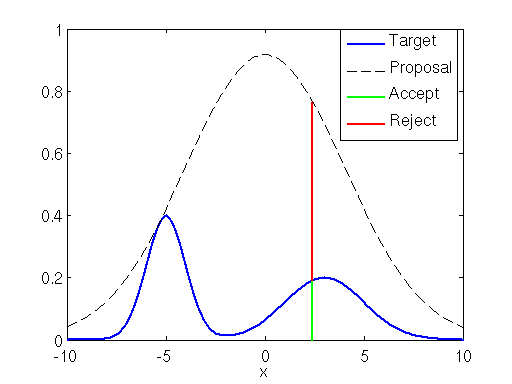


**Бонус 1 (1 балл):** Реализуйте rejection sampling. В качестве proposal distribution $q(x)$ используйте распределение Коши, в качестве целевого распределения $p(x)$ используйте стандартное нормальное распределение.

$$
q(x) = \frac{1}{\pi (1 + x^2)}
$$
$$
p(x) = \frac{1}{\sqrt{2\pi}} \exp\left(-\frac{1}{2}x^2\right)
$$

In [ ]:
def rejection_sampling(
    p: Callable[[np.ndarray], np.ndarray],
    q: Callable[[np.ndarray], np.ndarray],
    q_sampler: Callable[[int], np.ndarray],
    M: float = 1.5,
    num_samples: int = 10_000,
):
    """
    Perform rejection sampling to generate samples from a target distribution.

    Parameters:
    -----------
    p : Callable[[np.ndarray], np.ndarray]
        Target distribution from which we want to sample.
        Should accept numpy arrays as input and return density values.
    q : Callable[[np.ndarray], np.ndarray]
        Proposal distribution which is easy to sample from.
        Should accept numpy arrays as input and return density values.
    q_sampler : Callable[[int], np.ndarray]
        Function that generates n samples from the proposal distribution q.
        Should accept an integer n and return n samples.
    M : float, optional (default=1.5)
        Scaling factor such that p(x) ≤ M * q(x) for all x.
    num_samples : int, optional (default=10_000)
        Number of samples to generate from the target distribution.

    Returns:
    --------
    samples : numpy.ndarray
        Array of samples from the target distribution.
    acceptance_rate : float
        Proportion of proposals that were accepted.
    """
    # Waiting for implement (。-ω-)zzz
    raise NotImplementedError

In [ ]:
def normal_pdf(x: np.ndarray) -> np.ndarray:
    "p(x) density function"
    # Waiting for implement (。-ω-)zzz
    raise NotImplementedError


def cauchy_pdf(x: np.ndarray) -> np.ndarray:
    "q(x) density function"
    # Waiting for implement (。-ω-)zzz
    raise NotImplementedError


def sample_cauchy(size: int) -> np.ndarray:
    return scipy.stats.cauchy.rvs(size=size)


M = 1.5
samples, acceptance_rate = rejection_sampling(
    p=normal_pdf,
    q=cauchy_pdf,
    q_sampler=sample_cauchy,
    M=M,
    num_samples=10000,
)

mean = np.mean(samples)
std_dev = np.std(samples)

print(f"Acceptance rate: {acceptance_rate:.2%}")
print(f"Generated {len(samples)} samples from normal distribution")
print(f"Sample mean: {mean:.4f} (expected: 0)")
print(f"Sample std dev: {std_dev:.4f} (expected: 1)")

plt.hist(samples, bins=50, density=True, alpha=0.7, label="Samples")

x = np.linspace(-4, 4, 1000)
plt.plot(x, normal_pdf(x), "r-", lw=2, label="Standard Normal PDF")
plt.plot(x, M * cauchy_pdf(x), "g--", lw=2, label="Scaled Cauchy PDF")
plt.title("Rejection Sampling: Normal Distribution from Cauchy Proposal")

plt.xlabel("x")
plt.ylabel("Density")
plt.legend()
plt.grid(True, alpha=0.3)

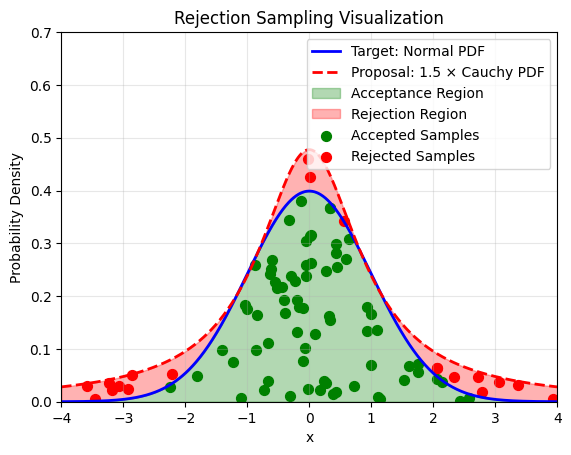

In [ ]:
def visualize_rejection_sampling(
    p: Callable[[np.ndarray], np.ndarray],
    q: Callable[[np.ndarray], np.ndarray],
    p_title: str,
    q_title: str,
    M: float,
):
    x = np.linspace(-4, 4, 1000)
    p_pdf = p(x)
    q_pdf = q(x)
    scaled_q = M * q_pdf

    plt.plot(x, p_pdf, "b-", lw=2, label=f"Target: {p_title} PDF")
    plt.plot(x, scaled_q, "r--", lw=2, label=f"Proposal: {M} × {q_title} PDF")
    plt.fill_between(x, 0, p_pdf, color="green", alpha=0.3, label="Acceptance Region")
    plt.fill_between(
        x,
        p_pdf,
        scaled_q,
        color="red",
        alpha=0.3,
        label="Rejection Region",
    )

    # Generate some example points to illustrate acceptance/rejection
    np.random.seed(42)
    num_points = 100

    x_samples = ...  # Waiting for implement (。-ω-)zzz
    y_samples = ...  # Waiting for implement (。-ω-)zzz
    accepted = ...  # Waiting for implement (。-ω-)zzz

    plt.scatter(
        x_samples[accepted],
        y_samples[accepted],
        color="green",
        s=50,
        label="Accepted Samples",
    )

    plt.scatter(
        x_samples[~accepted],
        y_samples[~accepted],
        color="red",
        s=50,
        label="Rejected Samples",
    )

    plt.title("Rejection Sampling Visualization")
    plt.xlabel("x")
    plt.ylabel("Probability Density")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.xlim(-4, 4)
    plt.ylim(0, 0.7)

    plt.show()


visualize_rejection_sampling(p=normal_pdf, q=cauchy_pdf, p_title="Normal", q_title="Cauchy", M=1.5)

Теперь когда мы научились генерировать данные из стандартного нормального распределения, можем посчитать дисперсию нормального распределения

$$
\int\limits_{-\infty}^{+\infty} x^2 \frac{1}{\sqrt{2\pi}} \exp\left(-\frac{1}{2}x^2\right)dx
$$

In [ ]:
num_samples = ...
samples = ...
variance = ...
print(f"Variance of normal distribution: {variance}")


Как видно, в rejection sampling нам нужно сгенерировать большую выборку, большую часть которой мы выкидываем. На это влияет в том числе и параметр $M$. Подберите оптимальный параметр $M$, чтобы выбрасывать как можно меньше, но при этом не генерировать лишние сэмлы (не из целового распределения): что будет если $M$ большое / маленькое? На этот раз возьмите не стандартное нормальное распределение, а с параметрами, которые захотите.


Плотность нормального распределения
$$
p(x) = \frac1{\sqrt{2\pi\sigma^2}}e^{-\frac{(x - \mu)^2}{2\sigma^2}}
$$

- $\mu$ - математическое ожидание
- $\sigma^2$ - дисперсия

**Ответ:**

In [ ]:
# Waiting for implement (。-ω-)zzz

### Importance sampling

Как мы уже сказали, в rejection sampling большая часть сгенерированных данных не используется. Нам такое не подходит. Тогда на смену приходит *importance sampling*.

Допустим, нам нужно вычислить математическое ожидание функции $f(x)$ относительно распределения $p(x)$:

$$
\mathbb{E}[f(x)] = \int\limits_{-\infty}^{\infty} f(x) p(x)dx
$$

Если $q(x)$ — это распределение, из которого мы легко можем сэмплировать (**importance distribution**), то мы можем переписать ожидание как:

$$
\mathbb{E}[f(x)] = \int\limits_{-\infty}^{\infty} f(x) \frac{p(x)}{q(x)} q(x) \, dx
$$

Теперь, сэмплируя из распределения $q(x)$, мы можем вычислить приблизительное значение матожидания через среднее взвешенных значений $f(x)$, где веса — это отношение вероятностей из $p(x)$ и $q(x)$:

$$
\mathbb{E}[f(x)] \approx \frac{1}{N} \sum_{i=1}^{N} f(x_i) \frac{p(x_i)}{q(x_i)},
$$

где
- $x_i$ — выборка из распределения $q(x)$,
- $\frac{p(x_i)}{q(x_i)}$ — вес для каждого сэмпла

**Бонус 2 (1 балл):** Реализуйте importance sampling и сравните его с naive Monte-Carlo / Rejection Samping). Подумайте, какие недостатки у этого метода. Можете взять любые функции $f(x)$, $p(x)$ и $q(x)$. Подберите хороший proposal $q(x)$.

**Ответ:**

In [ ]:
def importance_sampling(
    f: Callable[[np.ndarray], np.ndarray],
    p: Callable[[np.ndarray], np.ndarray],
    q: Callable[[np.ndarray], np.ndarray],
    q_sampler: Callable[[int], np.ndarray],
    num_samples: int = 10000,
):
    """
    Estimate the expected value of a function under a target distribution using importance sampling.

    Parameters:
    -----------
    f : Callable[[np.ndarray], np.ndarray]
        Function whose expectation we want to estimate.
        Should accept numpy arrays as input and return function values.
    p : Callable[[np.ndarray], np.ndarray]
        Target distribution under which to compute the expectation.
        Should accept numpy arrays as input and return density values.
    q : Callable[[np.ndarray], np.ndarray]
        Proposal distribution from which we sample.
        Should accept numpy arrays as input and return density values.
    q_sampler : Callable[[int], np.ndarray]
        Function that generates n samples from the proposal distribution q.
        Should accept an integer n and return n samples.
    num_samples : int, optional (default=10000)
        Number of samples to use for the estimation.

    Returns:
    --------
    estimate : float
        Estimated value of E_p[f(X)].
    """
    # Waiting for implement (。-ω-)zzz
    raise NotImplementedError

In [ ]:
# Waiting for implement (。-ω-)zzz

P.S. В байесовских методах часто возникают распределения, которые неизвестны с точностью до нормализующей константы (чтобы интеграл был равен $1$). В этом случае importance sampling есть преимущество перед naive Monte-Carlo / rejection sampling: для него не нужно знать нормализующую константу!!

### Metropolis–Hastings algorithm

На последок расскажем про Metropolis–Hastings algorithm

Алгоритм основан на идее построения цепи Маркова, где каждая следующая точка зависит от предыдущей, и цепь будет сходиться к целевому распределению, если алгоритм работает достаточно долго


1. **Initialization**: Начинаем с случайной точки $x_0$, которая будет нашей начальной точкой цепи

2. **Propose a candidate**: На каждом шаге выбираем кандидат $x'$ для следующей точки цепи. Этот кандидат генерируется с помощью какого-то предложения (например, из простого распределения, как нормальное распределение с центром в текущей точке $x_t$)

3. **Accept or reject:**: Затем решаем, принимать ли кандидата $x'$ или оставаться в текущей точке $x_t$. Для этого рассчитываем отношение вероятностей:
   $$
   \alpha = \min\left( 1, \frac{p(x') q(x_t | x')}{p(x_t) q(x' | x_t)} \right)
   $$
   где:
   - $p(x')$ и $p(x_t)$ — это значения целевого распределения вероятности для $x'$ и $x_t$ соответственно
   - $q(x_t | x')$ и $q(x' | x_t)$ — это вероятности перехода между состояниями, то есть вероятность предложить $x_t$ из $x'$ и наоборот (условные плотности распределений)

   Если случайное число $u$ из равномерного распределения на отрезке $[0,1]$ меньше $\alpha$, то принимаем $x'$, иначе остаемся на текущем $x_t$

4. **Повторение**: Повторяем шаги 2-3 для получения последовательности точек $x_0, x_1, x_2, \ldots$, которые с каждым шагом всё больше приближаются к целевому распределению

**Бонус 3 (до 3 баллов):** Можете прочитать и попробовать воспроизвести результаты [блога](https://blog.djnavarro.net/posts/2023-04-12_metropolis-hastings/). Попробуйте аналогично проанализировать другие распределения (можно многомерное нормальное). Постройте графики, как ведет себя последовательность в двумерном нормальном распределении, например. Если какие-то формулы захотите написать, то не забудьте их добавить сюда. Количество баллов проверяющий выставит по своему *субъективному* усмотрению, на то это и бонус. В общем, задание исследовательское.


In [ ]:
# Waiting for implement (。-ω-)zzz

Тут можете оставить свой комментарий по поводу лабораторной: